In [1]:
from pathlib import Path
import json
from tqdm import tqdm

In [2]:
data_file = Path("data/4gk_packs.jsonl")
pack_metas_dir = Path("data/pack_meta")
pack_metas_file = Path("data/pack_meta.jsonl")

In [3]:
'''
Merging the metainfo files
'''

# merged_lines = []
#
# for json_path in tqdm(pack_metas_dir.glob("*.json")):
#     with open(json_path, "r", encoding="utf-8") as f:
#         content = f.read().strip()
#         if content:
#             merged_lines.append(content)
#
# merged_file = Path("pack_meta_merged.jsonl")
# with open(merged_file, "w", encoding="utf-8") as f:
#     f.write("\n".join(merged_lines))

In [5]:
'''
Reading main data file and metainfo file
'''

records = []
with open(data_file, "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():  # skip blank lines
            records.append(json.loads(line))

pack_meta = []
with open(pack_metas_file, "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():  # skip blank lines
            pack_meta.append(json.loads(line))
pack_meta_dict = dict()
for meta in pack_meta:
    pack_meta_dict[meta["pack_id"]] = meta

print(len(records))
print(len(pack_meta_dict))

In [7]:
'''
Merging the metainfo into the main data file
'''

i = 0
records_with_meta = []
for record in records:
    meta = pack_meta_dict.get(record["pack_id"], None)
    if not meta:
        continue
    i += 1
    meta.pop("pack_id")
    meta.pop("num_questions")
    meta.pop("pack_title")
    meta.pop("difficulty_raw")
    record.update(meta)
    records_with_meta.append(record)
print(len(records_with_meta))

6323


In [8]:
'''
Saving the metainfo into the main data file
'''

out_path = Path("data/4gk_packs_with_meta.jsonl")

with out_path.open("w", encoding="utf-8") as f:
    for record in records_with_meta:
        json_line = json.dumps(record, ensure_ascii=False)
        f.write(json_line + "\n")

In [4]:
'''
Reading the metainfo into the main data file
'''

records_with_meta_path = Path("data/4gk_packs_with_meta.jsonl")
records_with_meta = []
with open(records_with_meta_path, "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():  # skip blank lines
            records_with_meta.append(json.loads(line))

In [6]:
'''
Flattening the questions
'''

out_path = Path("data/4gk_packs_with_meta_flat.jsonl")
for record in tqdm(records_with_meta):
    questions = record.pop("questions")
    for question in questions:
        record.pop("tours", None)
        record["pack_difficulty_alt"] = record.pop("difficulty_alt", None)
        record["pack_difficulty_trueDL"] = record.pop("difficulty_trueDL", None)
        question.update(record)
        json_line = json.dumps(question, ensure_ascii=False)
        with out_path.open("a", encoding="utf-8") as f:
            f.write(json_line + "\n")

In [2]:
'''
Reading the flattened questions
'''

packs_with_meta_flat_path = Path("data/4gk_packs_with_meta_flat.jsonl")
packs_with_meta_flat = []
with open(packs_with_meta_flat_path, "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():  # skip blank lines
            packs_with_meta_flat.append(json.loads(line))

print(len(packs_with_meta_flat))

In [5]:
'''
Geting info about difficulties
'''

diffs_true = []
diffs_alt = []
for pack in records_with_meta:
    diff_true = pack.pop("difficulty_trueDL", None)
    diff_alt = pack.pop("difficulty_alt", None)
    if diff_true:
        diffs_true.append(diff_true)
    if diff_alt:
        diffs_alt.append(diff_alt)
print(f"{len(diffs_true)}/{len(records_with_meta)} with trueDL diff")
print(f"{len(diffs_alt)}/{len(records_with_meta)} with alt diff")

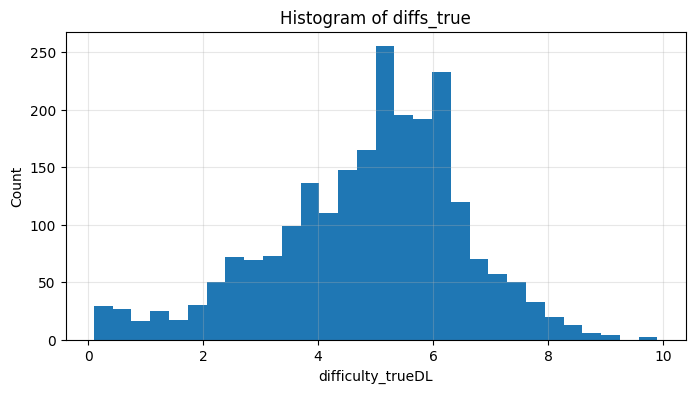

In [10]:
'''
Plotting the difficulties
'''

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(diffs_true, bins=30)  # adjust bins as needed
plt.xlabel("difficulty_trueDL")
plt.ylabel("Count")
plt.title("Histogram of diffs_true")
plt.grid(True, alpha=0.3)
plt.show()